In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import copy

from pcse.fileinput import CABOFileReader
from pcse.models import Wofost71_PP
from pcse.fileinput import CABOWeatherDataProvider
from pcse.base.parameter_providers import ParameterProvider
from pcse.util import WOFOST71SiteDataProvider
from pcse.fileinput import YAMLAgroManagementReader

%matplotlib inline

In [2]:
from enwofost import enwofost

## First, try making ensembles from just the strings pointing towards the different WOFOST components

In [4]:
# point towards the distribution CSV
distribution_file = 'par_prior.csv'

# the crop parameter file
crop_file = 'data/henan_crop_params.CAB'

# the soil parameter file
soil_file = 'data/Hengshui.soil'

# add a file descriptor to highlight the weather files with wildcards.
# each file describes daily weather stats for one year.
weather_point = 'data/henan_s01*'

# and give the model the timer file which controls the dates for WOFOST
timer_file = 'data/timer.amgt'


ensemble_number = 20

# set it up in potential mode at first - it has all the water it needs
ensembles_1 = enwofost(ensemble_number,'potential')

ensembles_1.Generate_With_Dists_From_Scratch(distribution_file,crop_file,soil_file,weather_point,timer_file)

In [5]:
# display the results for a few parameters

# define some parameters we want to see
target_parameters = ['LAI', 'TWSO', 'DVS']

# use the method Extract_Params to get a dictionary of outputs
outputs_1 = ensembles_1.Extract_Params(target_parameters)

In [41]:
# using the Extract_Params is a usefull method to put the ensembles into 2d array for each parameter.
# it returns a dictionary with each given key is an output parameters
print (outputs_1.keys())

# each limb of the dictionary is ensemble_number * num_of_days
print (outputs_1[target_parameters[0]].shape)
print ('Dim 1 = %s ensemble runs, Dim 2 = %s number of days'%(ensemble_number,outputs_1[target_parameters[0]][0].shape))

dict_keys(['LAI', 'TWSO', 'DVS'])
(20, 273)
Dim 1 = 20 ensemble runs, Dim 2 = (273,) number of days


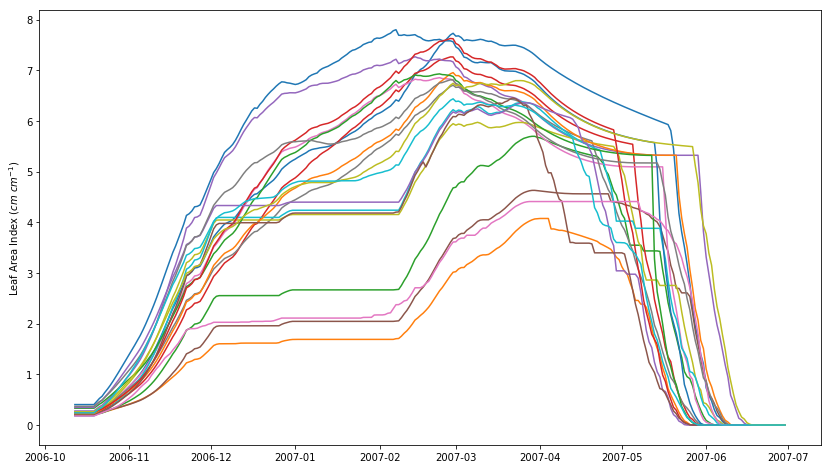

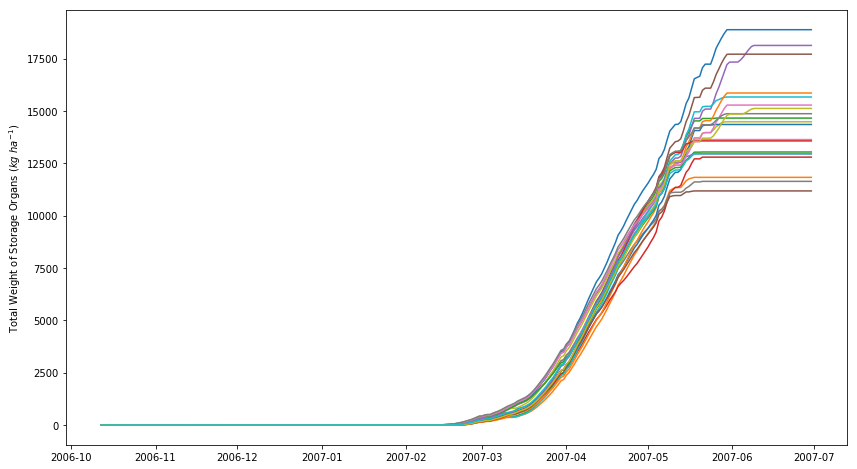

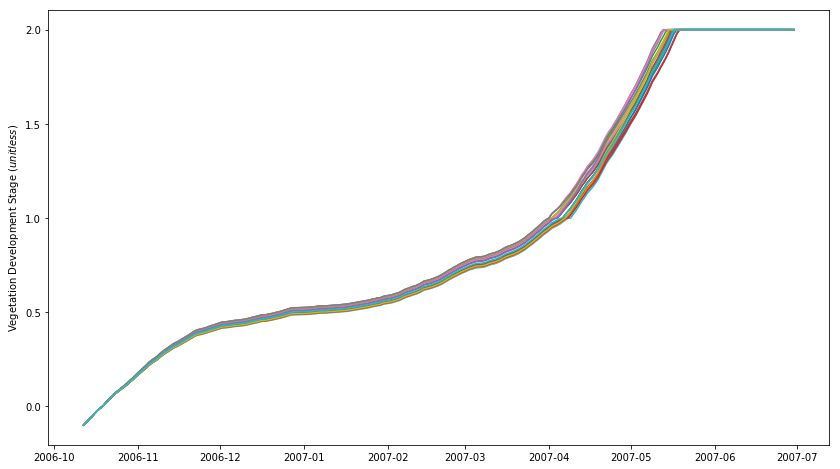

In [42]:
# loop through the parameters
for n,i in enumerate(target_parameters):
    
    # extract the key in the dictionary
    out_param = outputs_1[i]
    
    plt.figure(figsize=(14,8))
    plt.ylabel(ensembles_1._units(i))
    # loop throug the ensembles
    for j in out_param:
        plt.plot(ensembles_1.Time(), j)

In [6]:
# repeat in limied mode:
ensembles_12 = enwofost(ensemble_number,'limited')

ensembles_12.Generate_With_Dists_From_Scratch(distribution_file,crop_file,soil_file,weather_point,timer_file)

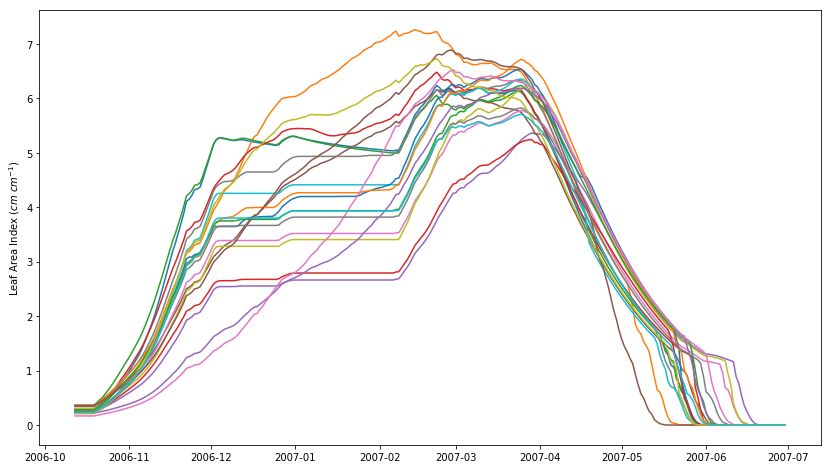

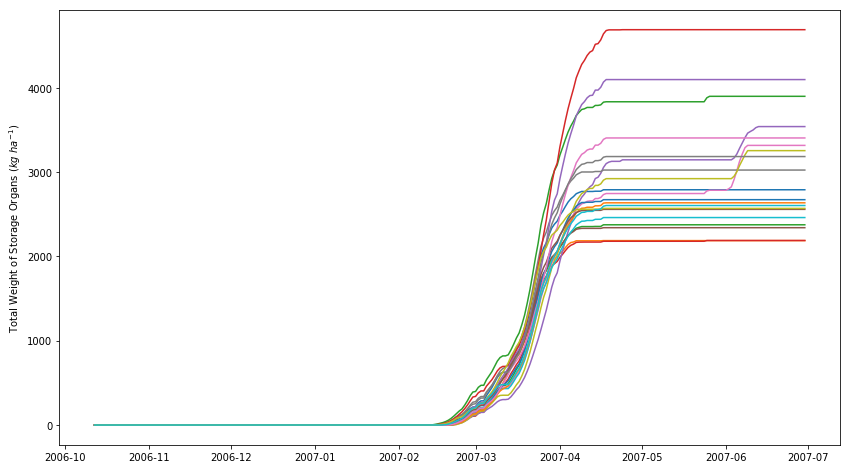

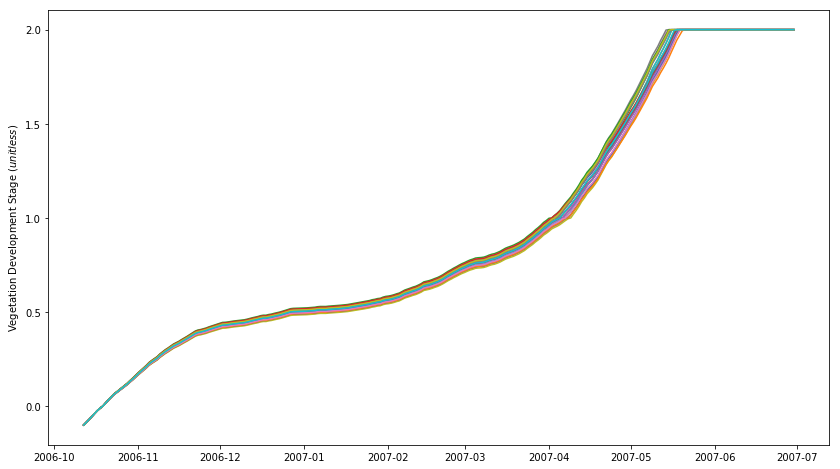

In [9]:
# use the method Extract_Params to get a dictionary of outputs
outputs_12 = ensembles_12.Extract_Params(target_parameters)
# loop through the parameters
for n,i in enumerate(target_parameters):
    
    # extract the key in the dictionary
    out_param = outputs_12[i]
    
    plt.figure(figsize=(14,8))
    plt.ylabel(ensembles_12._units(i))
    # loop throug the ensembles
    for j in out_param:
        plt.plot(ensembles_1.Time(), j)

## Next, run ensembles using established wofost objects:

In [10]:
# first, instantiate the WOFOST objects
crop = CABOFileReader(crop_file)
soil = CABOFileReader(soil_file)
site = WOFOST71SiteDataProvider(WAV=20, SSMAX=0, IFUNRN=0, SSI=0, SMLIM=0.065)

parameters = ParameterProvider(crop,soil,site)

weather = CABOWeatherDataProvider(weather_point)

agromanagement = YAMLAgroManagementReader(timer_file)

In [11]:
# add another campaign starting from a different year

new_start_date = dt.date(2007,10,15)

new_campaign = copy.deepcopy(agromanagement[0][dt.date(2006,10,1)])

# add the new start and end dates
new_campaign['CropCalendar']['crop_start_date'] = new_start_date
new_campaign['CropCalendar']['crop_end_date'] = dt.date(2008,6,15)

# and append it to the agromanager
agromanagement.append({new_start_date: new_campaign})

In [12]:
# ok, now run the ensembles using these new objects
ensembles_2 = enwofost(ensemble_number, 'potential')

ensembles_2.Generate_With_Dists_From_Objects('par_prior.csv',crop,soil,site,weather,agromanagement)

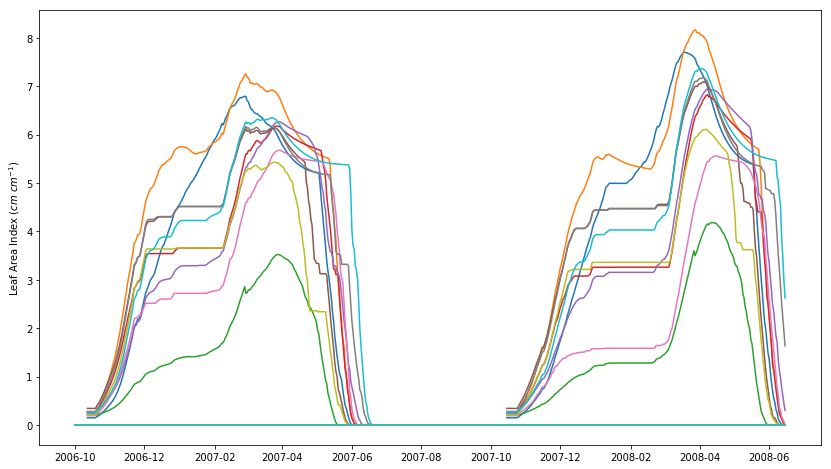

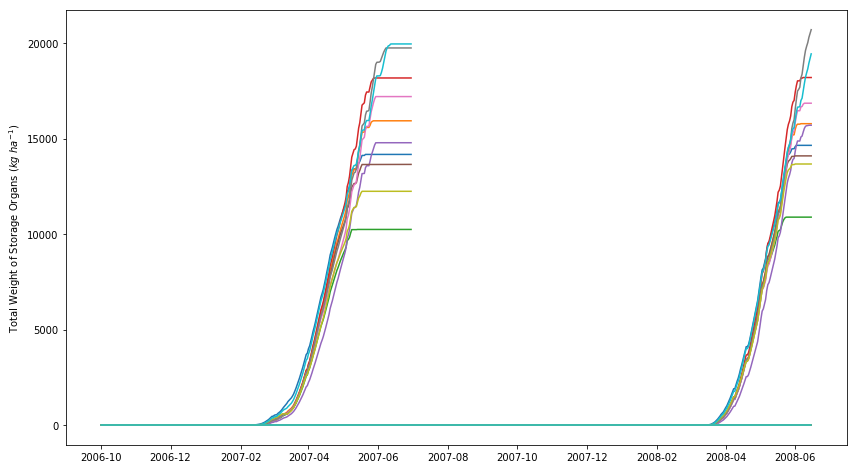

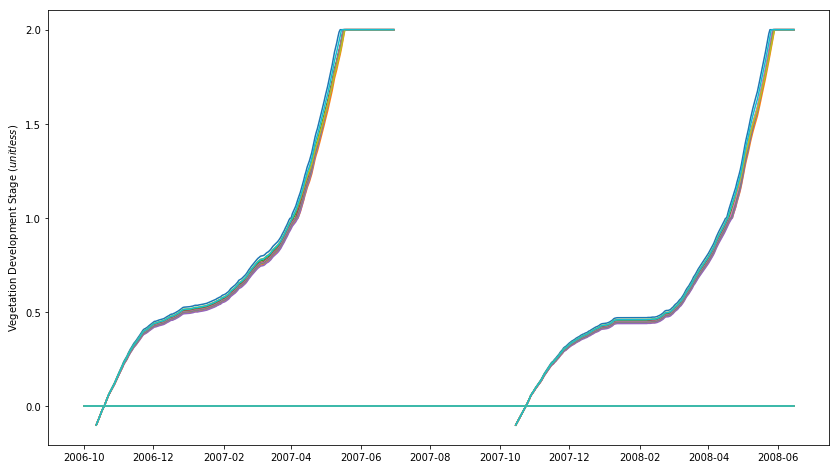

In [13]:
# define some parameters we want to see
target_parameters = ['LAI', 'TWSO', 'DVS']

# use the method Extract_Params to get a dictionary of outputs
outputs_2 = ensembles_2.Extract_Params(target_parameters)

# loop through the parameters
for n,i in enumerate(target_parameters):
    
    # extract the key in the dictionary
    out_param = outputs_2[i]
    
    plt.figure(figsize=(14,8))
    plt.ylabel(ensembles_2._units(i))
    # loop throug the ensembles
    for j in out_param:
        plt.plot(ensembles_2.Time(), j)

## We can use the PDF_Image method to display the probability distribution function for the ensemble space

This creates an image that finds the distribution of the ensembles at each day, and creates a 2d image at the sub day resolution.
<br/>(Note - the image is capped below it's maximum value to prevent the image from being washed out)

/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/acornelius/enwofost/git_repo/wofost_tools/enwofost.py:628: RuntimeWarning: invalid value encountered in double_scalars
  vertical, (lower_l - mu_l) / sigma_l, (upper_l - mu_l)\
/home/acornelius/enwofost/git_repo/wofost_tools/enwofost.py:629: RuntimeWarning: invalid value encountered in double_scalars
  / sigma_l,loc=mu_l,scale=sigma_l)
/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/acornelius/enwofost/git_r

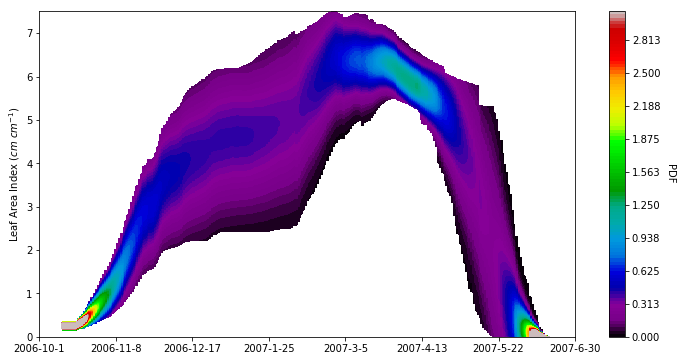

In [14]:
ensembles_1.PDF_Image('LAI')

/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/acornelius/enwofost/git_repo/wofost_tools/enwofost.py:632: RuntimeWarning: invalid value encountered in double_scalars
  vertical, (lower_u - mu_u) / sigma_u, (upper_u - mu_u)\
/home/acornelius/enwofost/git_repo/wofost_tools/enwofost.py:633: RuntimeWarning: invalid value encountered in double_scalars
  / sigma_u,loc=mu_u,scale=sigma_u)
/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/acornelius/enwofost/git_r

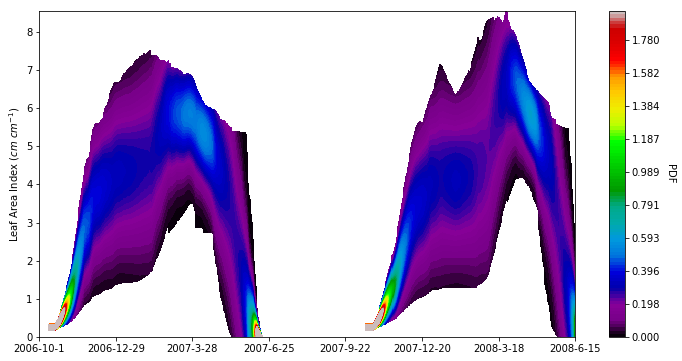

In [15]:
ensembles_2.PDF_Image('LAI')

/home/acornelius/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/home/acornelius/enwofost/git_repo/wofost_tools/enwofost.py:661: RuntimeWarning: invalid value encountered in greater
  capped = np.where(im_cap > max_val)


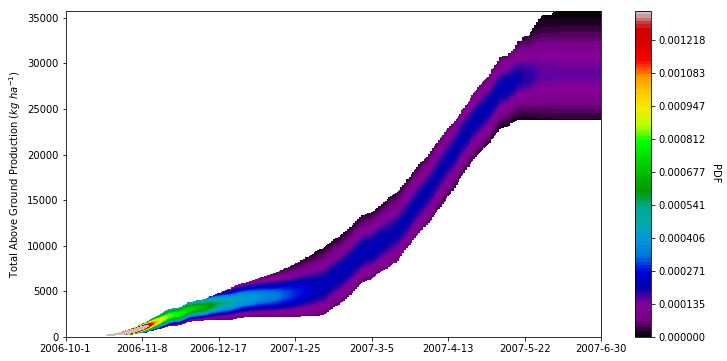

In [16]:
ensembles_1.PDF_Image('TAGP')